___
## Ciência dos Dados - PROJETO 3 - INSPER

___
#### Bruno Morales Balkins

#### Daniel do Carmo Granja de Castro

#### Omar Dibo Calixto Afrange Neto
___

# Qual a chance de um estudante entrar em uma faculdade baseado em diversos parametros relacionados a notas em exames e qualidade da faculdade.

___

## A. INTRODUÇÃO

Nesse trabalho iremos abordar 4 formas distintas de prever a chance de um aluno americano qualquer entrar em uma faculdade americana qualquer. Para isso utilizaremos uma base de dados que contem informações sobre alguns candidatos de universidades variadas. As variáveis incluem notas em alguns testes, experiência com pesquisa, carta de recomendação e outros quesitos necessários, além disso ela traz a probabilidade dele ser aceito na universidade desejada. O intuito principal deste projeto é prever a probabilidade do aluno conseguir passar na universidade e alem disso entender qual das formas de predicao e melhor e porque.

___
## B. MINERANDO DADOS e CARACTERÍSTICAS DO DATASET

[Detalhe aqui as características da base de dados além da análise descritiva.]

In [425]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

### BASE DE DADOS

In [427]:
dados = pd.read_csv('Admission_Predict.csv')
dados

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


Serial No.: Número de série do aluno

GRE Scores: Nota do aluno no teste GRE

TOEFL Scores: Nota do aluno no teste TOEFL

University Rating: Classificação do nível de ensino da universidade desejada

Statment of purpose (SOP): Qualidade do texto sobre o objeto de pesquisa do aluno

Letter of recomendation (LOR): Qualidade da carta de recomendação do aluno

Undergraduate Grade Point Average (CGPA): Média acadêmica do aluno

Research: Experiência com pesquisa. 1- Sim, 2- Não

Change of Admission: Probabilidade de admissão do aluno

In [428]:
dados = dados.drop("Serial No.",axis=1)

### ANÁLISE DESCRITIVA

**Variáveis Quantitativas**

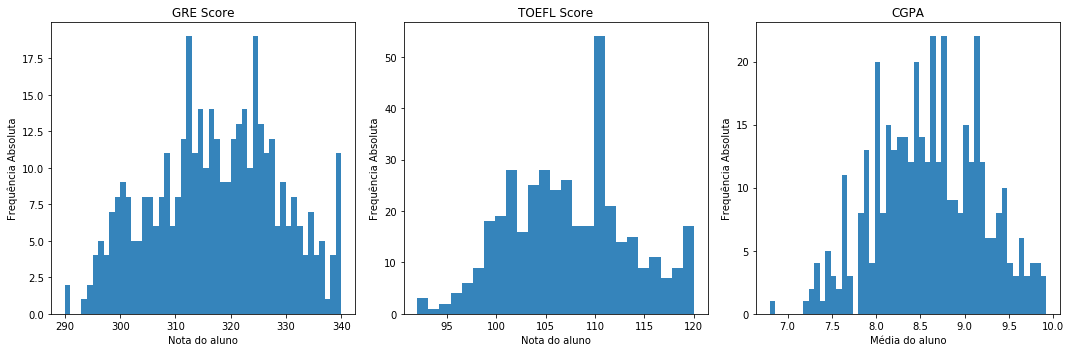

In [429]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
plot = dados["GRE Score"].plot.hist(bins=50,title='GRE Score', alpha=0.9)
plt.ylabel('Frequência Absoluta')
plt.xlabel('Nota do aluno')

plt.subplot(132)
plot = dados["TOEFL Score"].plot.hist(bins=25,title='TOEFL Score', alpha=0.9)
plt.ylabel('Frequência Absoluta')
plt.xlabel('Nota do aluno')

plt.subplot(133)
plot = dados["CGPA"].plot.hist(bins=50,title='CGPA', alpha=0.9)
plt.ylabel('Frequência Absoluta')
plt.xlabel('Média do aluno')

plt.tight_layout()
plt.show()

Text(0.5,0,'Nota do aluno')

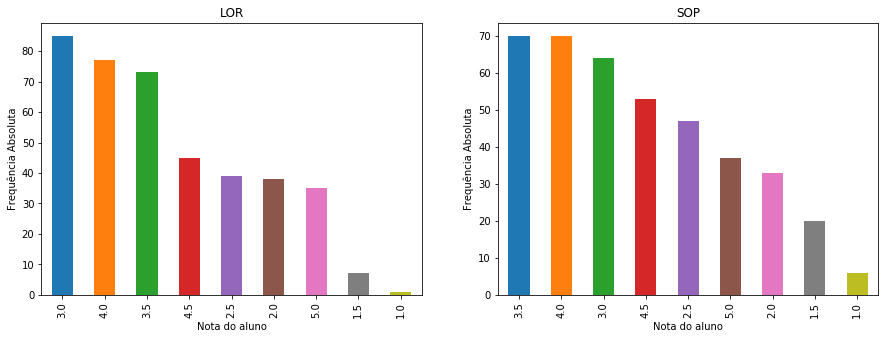

In [430]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(121)
adQuantitativa2 = dados["LOR "].value_counts()
plot = adQuantitativa2.plot(kind='bar', legend=False,title="LOR");
plt.ylabel('Frequência Absoluta')
plt.xlabel('Nota do aluno')

plt.subplot(122)
adQuantitativa3 = dados["SOP"].value_counts()
plot = adQuantitativa3.plot(kind='bar', legend=False,title="SOP");
plt.ylabel('Frequência Absoluta')
plt.xlabel('Nota do aluno')

**Variável Qualitativa**

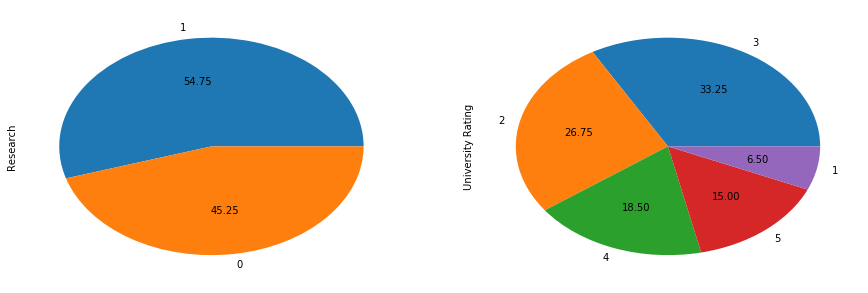

In [431]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(121)
adQualitativa = dados['Research'].value_counts()
adQualitativa.plot(kind='pie', autopct="%0.2f",legend=False);

plt.subplot(122)
adQuantitativa = dados['University Rating'].value_counts()
adQuantitativa.plot(kind='pie', autopct="%0.2f",legend=False);

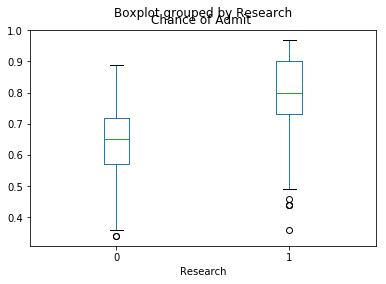

In [521]:
dados.boxplot(column=['Chance of Admit '], by='Research', grid=False);

Após a análise univariada vamos estudar como elas se correlacionam. Utilzaremos uma matriz de cores para entender a influência de cada uma delas.

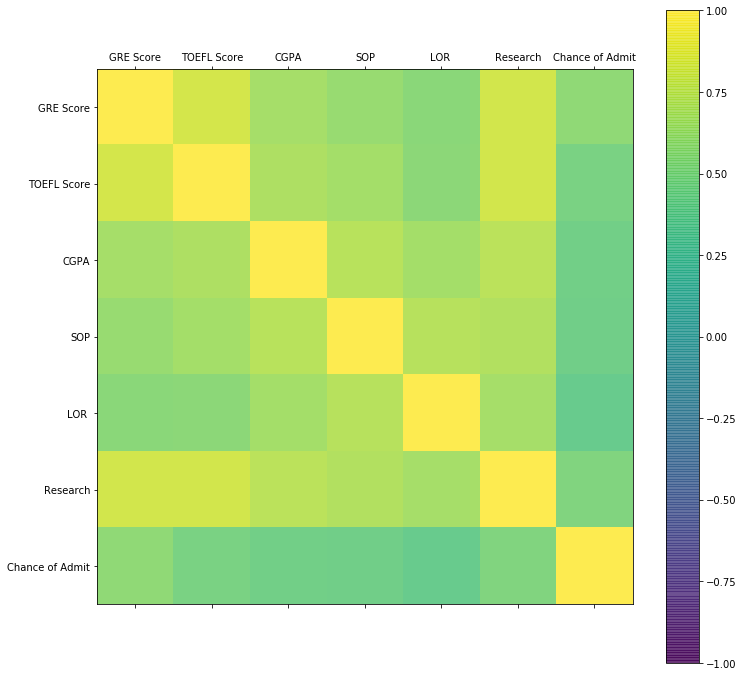

In [433]:
correl = dados.iloc[:,:7].corr()
correl
names = ['GRE Score','TOEFL Score','CGPA','SOP','LOR ','Research','Chance of Admit']
d = len(names)

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correl, interpolation='none', vmin=-1, vmax=1 ,alpha=0.8)
fig.colorbar(cax)
ticks = np.arange(0,d,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

plt.show()

___
## C. MODELOS DE PREDIÇÃO

In [473]:
trainingSet, testSet = train_test_split(dados, test_size = 0.25)

In [435]:
X_treinamento = trainingSet[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ','CGPA', 'Research']]
X_teste = testSet[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ','CGPA', 'Research']]

Y_treinamento = trainingSet['Chance of Admit ']
Y_teste = testSet['Chance of Admit ']
X_treinamento_quali = trainingSet[['Research']]
X_teste_quali = testSet[['Research']]

o MODELO DE PREDIÇÃO PELA MÉDIA (Sem uso de variável explicativa).

In [436]:
mu = Y_treinamento.mean()
mu2 = Y_teste.mean()

In [437]:
mu


0.7268000000000003

o MODELO DOS K VIZINHOS MAIS PRÓXIMOS (K-Nearest Neighbors Regression)

In [438]:
X2=dados[['CGPA','TOEFL Score','GRE Score','University Rating','SOP','LOR ']]
Y2=dados['Chance of Admit ']
X_tre,X_tes,y_tre,y_tes = train_test_split(X2,Y2,test_size=.25,random_state=0)

<function matplotlib.pyplot.show(*args, **kw)>

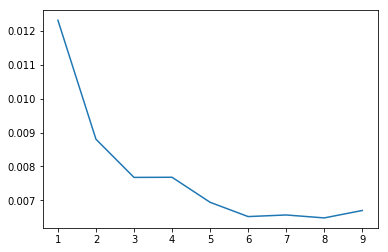

In [439]:
lista_valorK=np.arange(1,10,1)
lista_resultadoK=[]
for e in lista_valorK:
    clf=KNeighborsRegressor(e)
    clf.fit(X_tre,y_tre)
    y_pred=clf.predict(X_tes)
    lista_resultadoK.append(mean_squared_error(y_tes,y_pred))
    
plt.plot(lista_valorK, lista_resultadoK)    
plt.show

In [499]:
clf=KNeighborsRegressor(8)
clf.fit(X_tre,y_tre)
y_pred_treinamento=clf.predict(X_tre)
print(mean_squared_error(y_tre,y_pred_treinamento))

0.004328338541666666


In [500]:
y_pred_teste=clf.predict(X_tes)
print(mean_squared_error(y_tes,y_pred_teste))

0.006486624999999999


o MODELO DE REGRESSÃO LINEAR (Multiple Linear Regression)

In [501]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [443]:
results = regress(X_treinamento,Y_treinamento)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     166.4
Date:                Tue, 28 May 2019   Prob (F-statistic):           5.71e-98
Time:                        18:48:41   Log-Likelihood:                 395.27
No. Observations:                 300   AIC:                            -774.5
Df Residuals:                     292   BIC:                            -744.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2445      0.149     -8.350      0.000      -1.538      -0.951
GRE Score             0.0016      0.001      2.184      0.030       0.000       0.003
TOEFL Score           0.0029      0.001      2.171      0.031       0.000       0.005
University Rating     0.0042      0.005      0.773      0.440      -0.007       0.015
SOP                  -0.0011      0.006     -0.169      0.866      -0.014       0.012
LOR                   0.0190      0.007      2.915      0.004       0.006       0.032
CGPA                  0.1237      0.015      8.381      0.000       0.095       0.153
Research              0.0293      0.010      3.061      0.002       0.010       0.048
==============================================================================
Omnibus:                       69.761   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.404
Skew:                          -1.179   Prob(JB):                     4.40e-32
Kurtosis:                       5.449   Cond. No.                     1.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [444]:

y_p_treinamento = results.predict(sm.add_constant(X_treinamento))
y_p_teste = results.predict(sm.add_constant(X_teste))


In [445]:
y_p_treinamento, y_p_teste

(171    0.879392
 45     0.833209
 89     0.765494
 339    0.775052
 99     0.808841
 319    0.777522
 312    0.800440
 388    0.517338
 293    0.634750
 101    0.623394
 146    0.667993
 326    0.561628
 77     0.581378
 313    0.584673
 333    0.737649
 160    0.568178
 390    0.623888
 349    0.607871
 178    0.631407
 304    0.647188
 173    0.865858
 43     0.836300
 180    0.609370
 127    0.742164
 41     0.659508
 63     0.708596
 24     0.959594
 332    0.653917
 299    0.710955
 301    0.722357
          ...   
 137    0.650839
 261    0.638960
 120    0.950000
 259    0.908378
 103    0.688645
 4      0.632548
 141    0.882672
 81     0.954962
 354    0.523644
 9      0.712113
 157    0.624076
 11     0.838097
 17     0.654537
 294    0.653383
 289    0.757371
 292    0.554258
 92     0.568122
 50     0.689261
 179    0.629013
 5      0.871575
 116    0.667881
 1      0.805751
 70     0.957949
 243    0.816236
 34     0.960040
 74     0.767626
 352    0.625493
 35     0.8613

o MODELO DE ÁRVORES DE REGRESSÃO (Decision Tree Regression)

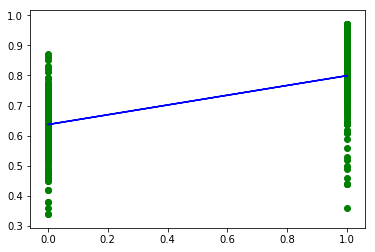

In [446]:
X3 = trainingSet[["Research"]]
Y3 = trainingSet["Chance of Admit "]
regressor = DecisionTreeRegressor(random_state = 1)
regressor.fit(X3, Y3)
plt.scatter(X3, Y3, color = 'green')
plt.plot(X3, regressor.predict(X3), color = 'blue')
plt.show()

In [447]:
arvore_previsao = regressor.predict(X_treinamento_quali)
arvore_previsao2 = regressor.predict(X_teste_quali)

In [448]:
arvore_previsao, arvore_previsao2

(array([0.79939759, 0.79939759, 0.79939759, 0.79939759, 0.79939759,
        0.79939759, 0.79939759, 0.63686567, 0.79939759, 0.63686567,
        0.63686567, 0.63686567, 0.63686567, 0.63686567, 0.79939759,
        0.63686567, 0.63686567, 0.63686567, 0.63686567, 0.63686567,
        0.79939759, 0.63686567, 0.63686567, 0.79939759, 0.79939759,
        0.79939759, 0.79939759, 0.79939759, 0.63686567, 0.63686567,
        0.79939759, 0.79939759, 0.79939759, 0.79939759, 0.63686567,
        0.79939759, 0.63686567, 0.79939759, 0.79939759, 0.79939759,
        0.63686567, 0.63686567, 0.63686567, 0.63686567, 0.79939759,
        0.63686567, 0.63686567, 0.63686567, 0.79939759, 0.63686567,
        0.63686567, 0.79939759, 0.79939759, 0.79939759, 0.79939759,
        0.63686567, 0.63686567, 0.79939759, 0.63686567, 0.63686567,
        0.79939759, 0.79939759, 0.63686567, 0.63686567, 0.79939759,
        0.79939759, 0.63686567, 0.63686567, 0.79939759, 0.79939759,
        0.63686567, 0.79939759, 0.79939759, 0.79

___
## D. PROCESSO E ESTATÍSTICAS DE VALIDAÇÃO

[Esse item depende dos resultados das modelagens anteriores! Organize-os aqui de forma clara!]

MEDIA

In [449]:
adm = (Y_treinamento - mu)**2
   
adm2 = (Y_teste - mu)**2



In [450]:
x = adm.mean()
y = adm2.mean()

In [451]:
rmstreino = x**0.5
rmsteste = y**0.5

In [452]:
rmstreino, rmsteste


(0.14472419746999224, 0.13540694221493962)

KNN PROXIMOS

In [502]:
knn = (Y_treinamento - y_pred_treinamento)**2
knn2 = (Y_teste - y_pred_teste)**2

In [504]:
knn_media = knn.mean()
knn2_media = knn2.mean()

In [505]:
rmsknn = knn_media**0.5
rmsknn2 = knn2_media**0.5

In [506]:
rmsknn, rmsknn2

(0.19642493530184338, 0.18150654258180338)

In [513]:
knn_media = (Y_treinamento - mu)**2
knn_media2 = (Y_teste - mu2)**2

In [516]:
r2knn = 1 - (knn.sum()/knn_media.sum())
r2knn2 = 1 - (knn2.sum()/knn_media2.sum())

In [517]:
r2knn, r2knn2

(-0.8420903929289405, -0.8062736443883989)

REGRESSAO LINEAR

In [460]:
reg = (Y_treinamento - y_p_treinamento)**2

reg2 = (Y_teste - y_p_teste)**2

In [461]:
x2 = reg.mean()
y2 = reg2.mean()

In [462]:
rmstreino2 = x2**0.5
rmsteste2 = y2**0.5

In [463]:
rmstreino2, rmsteste2

(0.06479683253352947, 0.05827435866343301)

In [464]:
reg_X = (Y_treinamento - mu)**2
reg_Y = (Y_teste - mu2)**2

In [465]:
r2reg = 1 - (reg.sum()/reg_X.sum())
r2reg2 = 1 - (reg2.sum()/reg_Y.sum())

In [466]:
r2reg, r2reg2

(0.7995411412325244, 0.8138110160845207)

ARVORE DECISAO

In [467]:
tree01=(Y_treinamento-arvore_previsao)**2
tree012=tree01.mean()
tree012=tree012**0.5
tree012

0.12006697216034191

In [468]:
tree02=(Y_teste-arvore_previsao2)**2
tree022=tree02.mean()
tree022=tree022**0.5
tree022

0.11441770855923862

In [469]:
tree01_media=(Y_treinamento-mu)**2
tree02_media=(Y_teste-mu)**2

In [470]:
R2_tree01=1-(tree01.sum()/tree01_media.sum())
R2_tree01

0.3117205268878096

In [471]:
R2_tree02=1-(tree02.sum()/tree02_media.sum())
R2_tree02

0.2859894479670151

___
## E. CONCLUSÃO

Baseando-se em nossos quatro modelos de predicao para prever qual a chance de um aluno (nos EUA), baseado em 7 variaveis, de ingressar em determinada universidade, podemos perceber clara diferenca de precisao entre a predicao pela media que possui uma valor de RMS alto, indicando que o modelo nao e tao preciso, ja os modelos de predicao pelo KNN proximo e pela arvore de decisao(DecisionTreeRegressor) sao superiores ao modelo de predicao pela media, porem nao chegam ao mesmo patamar de acerto da regressao linear que apresenta um RMS relativamente bem baixo em relacao aos demais.

___
## F. REFERÊNCIAS BIBLIOGRÁFICAS

https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/

https://www.kaggle.com/mohansacharya/graduate-admissions